In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [13]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

<Axes: >

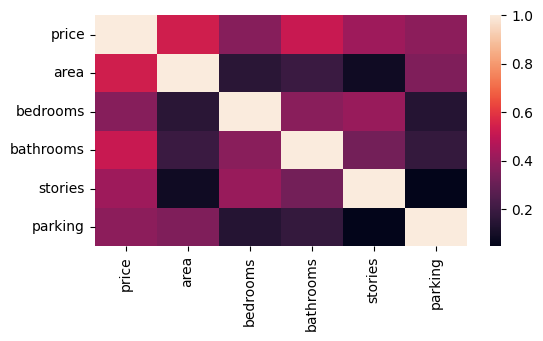

In [15]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr())

In [16]:
# Bathrooms, Area, stories, Bedrooms

In [17]:
df = df.drop(["airconditioning","hotwaterheating","mainroad","furnishingstatus","parking","guestroom", "basement"], axis = 1)
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories'], dtype='object')

<Axes: >

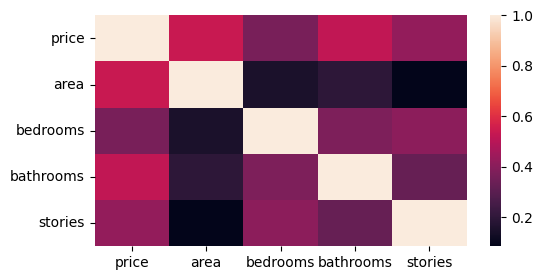

In [18]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr())

In [19]:
#df.plot(kind="box", subplots=True, sharey = False, figsize=(20,5))

In [20]:
df.describe()

,price,area,bedrooms,bathrooms,stories
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000


In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


In [22]:
# from sklearn import preprocessing
# encoder = preprocessing.LabelEncoder()

In [23]:
# df["guestroom"] = encoder.fit_transform(df["guestroom"])
# df["basement"] = encoder.fit_transform(df["basement"])
# df.head()

In [24]:
target = df["price"]
df = df.drop(["price"], axis = 1)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target,test_size = 0.3)

## Linear regression

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_train)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.5412281854189123

In [39]:
y_test_pred = lm.predict(x_test)
r2_score(y_test, y_test_pred)

0.5098065569635187

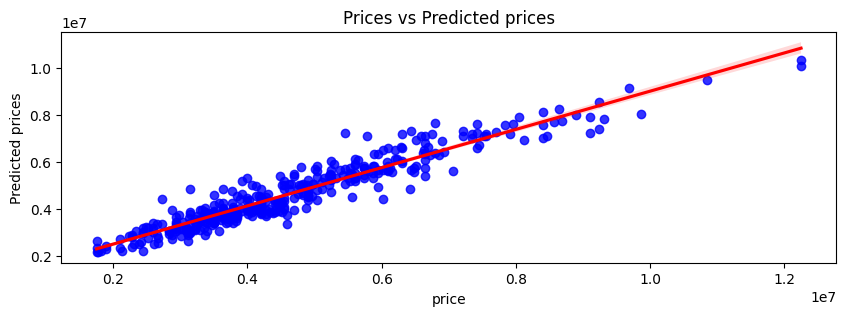

In [ ]:
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
g = sns.regplot(x = y_train, y = y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
g.figure.set_size_inches(10, 3)
plt.show()

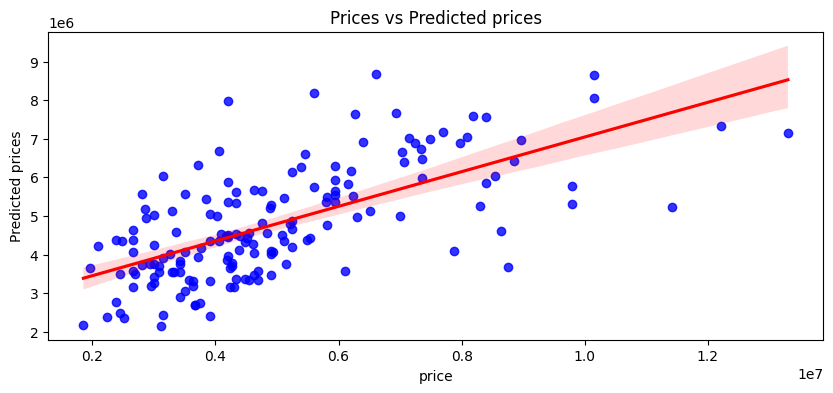

In [ ]:
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
g = sns.regplot(x = y_test, y = y_test_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
g.figure.set_size_inches(10, 3)
plt.show()